# Image Manipulation and Point Operations in Python
In this lab, we will explore fundamental techniques for image manipulation and point operations using Python.
The objectives of this lab include:

- Creating and visualizing image matrices.
- Reading, displaying, and processing images using libraries such as OpenCV and Matplotlib.
- Performing histogram-based operations, such as equalization and quantization, to enhance image contrast.
- Analyzing the effects of these operations on image quality and entropy.

---

### Understanding the Libraries Used
Before starting the lab, provide a brief definition of the following libraries and their role in image processing:

- **OpenCV**:

- **NumPy**:

- **Matplotlib**:

If not installed, you can install them using `pip install opencv-python numpy matplotlib`.

In [1]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Manipulation 1: Matrix Creation and Visualization
In this section, we will:
1. Create specific matrices using vectors A, B, and C.
2. Convert the matrices to `uint8` format.
3. Visualize the matrices using OpenCV and Matplotlib.

### Task 1: Matrix Creation
- **Matrix I1**: 64 rows identical to vector A.  
- **Matrix I2**: A 4x4 block of '1' surrounded by rows of 0 (based on vectors B and C).  
- **Matrix I3**: A 2x2 tiling of matrix I2.  



In [2]:
# Write the code to create vectors and matrices as described above
A = np.arange(1,64)
I1= np.tile(A , (64,1))
B= np.zeros((5,64) )
C= np.zeros((5,64) )
I2= np.zeros((5,64) )
I2[30:34 , 30:34] = 1 
I3 = np.tile(I2 , (2,2))


In [21]:


def showamge(image):
    
    
    cv.imshow('', image)  # Display the image in a window
    cv.waitKey(0)  # Wait for a key press
    cv.destroyAllWindows()  # Close the window


In [ ]:
print(I1)
print(I2)
print(I3)

### Task 2: Convert Matrices to uint8 and Visualize
- Convert matrices to `uint8` format using `np.uint8()`.  
- Visualize the matrices using both OpenCV and Matplotlib.  
- OpenCV displays images in a new window, while Matplotlib embeds them in the notebook.  

---

### Notes:
- `cv.imshow` opens images in a new window, which might not work in Google Colab.  
- Use Matplotlib (`plt.imshow`) in Colab to visualize images directly in the notebook.  
- `uint8` conversion ensures values stay within the valid image range (0-255).  


In [4]:
# Write the code to convert matrices to uint8 and visualize them using OpenCV or Matplotlib
I1_image =  (I1 / np.max(I1)  * 255).astype(np.uint8)
I2_image = (I2 *255).astype(np.uint8)
I3_image = (I2 *255).astype(np.uint8)

In [ ]:

# Display with Matplotlib
plt.figure(figsize=(10, 10))

# Display I1
plt.subplot(1, 3, 1)
plt.imshow(I1_image, cmap='gray')
plt.title('Matrix I1')
plt.axis('off')

# Display I2
plt.subplot(1, 3, 2)
plt.imshow(I2_image, cmap='gray')
plt.title('Matrix I2')
plt.axis('off')

# Display I3
plt.subplot(1, 3, 3)
plt.imshow(I3_image, cmap='gray')
plt.title('Matrix I3')
plt.axis('off')

plt.show()

In [ ]:

cv.imshow('Matrix I1 (OpenCV)', I1_image)
cv.waitKey(0)  # Ensure it waits for a key press
cv.destroyAllWindows()  # Close the window when done


## Manipulation 2: Image Reading and RGB Channel Operations
In this section, we will:
1. Read and visualize the image `mandrill.png`.
2. Display image properties (size, depth).
3. Separate RGB channels and visualize them independently.
4. Perform RGB channel swapping and save channels in different formats.
5. Convert the image to grayscale using two methods and compare the results.


### Task 1: Read and Display Image
- Use `cv.imread` to load the image.
- Note: OpenCV loads images in BGR format, so convert to RGB using `cv.cvtColor`.
- Visualize the image using Matplotlib.


In [7]:
# Write the code to read, convert, and display the image as described above
img = cv.imread('images/mandrill.png')

In [ ]:
cv.imshow('',img)
cv.waitKey(0)  # Ensure it waits for a key press
cv.destroyAllWindows()  # Close the window when done


### Task 2: Display Image Properties
- Display the image dimensions and data type.
- This provides insight into the image size, channels, and pixel depth.


In [ ]:
# Write the code to display the image properties such as shape and data type

print(f"Channels: {img.shape[2]}")
print(f"Image type: {img.dtype}")
print(f"image shape : {img.shape} ")


### Task 3: Separate and Visualize RGB Channels
- Split the image into R, G, and B channels using `cv.split()`.
- Visualize each channel separately.

`B, G, R = cv.split(your_BGR_image)`

or 

`R, G, B = cv.split(your_RGB_image)`

In [18]:
# Put your code here
R,G,B = cv.split(img)



In [ ]:
showamge(R)
showamge(G)
showamge(B)

### Task 4: RGB Channel Swapping
- Swap the RGB channels to visualize different combinations.
- Perform all combinations (RGB, RBG, GRB, GBR, BRG, BGR).

In [23]:
# Write the code to swap RGB channels and visualize different combinations
B,G,R = cv.split(img)

In [24]:
showamge(R)
showamge(B)
showamge(G)

### Task 5: Save RGB Channels in Different Formats
- Save the Red channel as `.png`, Green as `.bmp`, and Blue as `.jpeg`.
- Use `cv.imwrite` to save images.


In [ ]:
# Save channels in different formats
cv.imwrite('R.png', R)
cv.imwrite('B.jpeg', G)
cv.imwrite('G.bmp', B)


### Task 6: Convert an image to grayscale.

- Use `cv.cvtColor` to convert the image to grayscale.
- Make sure your are using the right transformation (BGR2GRAY or RGB2GRAY) according to your image format.
- Visualize the grayscale image.



Alternatively, use the previously extracted R, G, and B channels to manually compute the grayscale image using the following formula:

1. Weighted Grayscale Conversion:

`Igray = 0.2989 * R + 0.5870 * G + 0.1140 * B`

2. Simple Average Method:

`Igray = Mean(R, G, B)`

After applying this transformation, ensure that you properly visualize and compare the grayscale output from both methods to confirm consistency.

### Question:

- These coefficients `(0.2989, 0.5870, 0.1140)` are not arbitrary—they come from a standard model used in image processing.

- How are these coefficients determined? What do they represent, and why are they used instead of a simple average?

In [ ]:
# Convert your color image to grayscale

# Load the image (assuming BGR format as loaded by OpenCV)
img = cv.imread('R.png')

# Convert the image to grayscale using BGR2GRAY
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

showamge(gray_image)

In [29]:

# Compute the grayscale image using the weighted method
Igray_weighted = 0.2989 * R + 0.5870 * G + 0.1140 * B
Igray_weighted = Igray_weighted.astype(np.uint8)  # Convert to uint8 format

showamge(Igray_weighted)

In [30]:
# Compute the grayscale image using the simple average method
Igray_average = (R + G + B) / 3
Igray_average = Igray_average.astype(np.uint8)  # Convert to uint8 format

# Display the simple average grayscale image
showamge(Igray_average)




***Add your analysis and comments here***

The coefficients (0.2989, 0.5870, 0.1140) in grayscale conversion are based on the **luminance model** from the **ITU-R BT.601 standard**, which reflects how the human eye perceives brightness. The human eye is most sensitive to **green** (0.5870), less sensitive to **red** (0.2989), and least sensitive to **blue** (0.1140). A simple average of RGB values does not account for these differences, so the weighted method provides a more accurate representation of perceived brightness.

### Task 7: Negative Transformation
The negative transformation is a simple yet powerful operation applied to images. It inverts the pixel intensities of the image, enhancing white or gray details embedded in darker regions.

The formula for the negative transformation is:

    I_negative = 255 - I

In [31]:
# Write the code to compute the negative transformation
R_negative = 255 - R 

In [32]:
showamge(R)

### Task 8: Contrast and Brightness Adjustment
1. **Define what contrast and brightness adjustment is.**
   - Provide a brief explanation of how contrast and brightness adjustment works.
   - Include its formula:
      
     

   I_new = alpha x I + beta


Where:
   - I_new: Adjusted pixel intensity
   - I: Original pixel intensity
   - alpha: Gain
   - beta: Bias


2. **Explain the roles of alpha and beta:**
   - What does alpha (gain) control?
   - What does beta (bias) control?
   - How do changes to these parameters affect the appearance of an image?

*Write your answers below:*

**Contrast and Brightness Adjustment** modifies the intensity levels of an image to enhance its appearance. 

- **Contrast** adjusts the difference between light and dark areas, and **brightness** changes the overall lightness or darkness of the image.


- **α (alpha)**: Controls **contrast** by scaling pixel intensities (higher α increases contrast, lower α reduces contrast).
- **β (beta)**: Controls **brightness** by shifting pixel intensities (positive β makes the image lighter, negative β makes it darker).

In [56]:

def adjust_contrast_brightness(image, alpha=1.0, beta=0):
   
    adjusted_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

# Adjust contrast and brightness
alpha = 4 # Increase contrast
beta = 50   # Increase brightness
adjusted_image = adjust_contrast_brightness(img, alpha=alpha, beta=beta)

# Save or display the result
cv.imwrite('adjusted_image.jpg', adjusted_image)
cv.imshow('Adjusted Image', adjusted_image)
cv.waitKey(0)
cv.destroyAllWindows()

***Add your analysis and comments here***

...

---

### Task 9: Gamma Transformation

Gamma correction applies a non-linear adjustment to pixel intensities.

#### Formula:
I_gamma = 255 * (I / 255) ^ gamma

#### Where:
- I_gamma: Gamma-corrected pixel intensity
- I: Original pixel intensity
- gamma: Gamma value
  - gamma > 1: Darkens the image and enhances darker regions.
  - gamma < 1: Brightens the image and enhances brighter regions.

---

Explain the Utility of Gamma Transformation
1. Why is gamma correction important in image processing?
2. In what situations is gamma correction useful?
3. How does gamma correction help in adjusting images for different display devices?
4. What happens to the histogram of an image when applying gamma correction with gamma > 1 vs. gamma < 1?

*Write your answers below:*

In [46]:


def gamma_image(img, gamma):
    
    img_gamma = 255 * (img / 255) ** gamma
    return np.uint8(img_gamma)  # Ensure the result is in the valid 0-255 range


In [55]:
gm_img = gamma_image(img, 5 )
showamge(gm_img) 

***Add your analysis and comments here***

...

---

    ### Task 10: Thresholding (Binarization)

    Thresholding is a technique used to convert a grayscale image into a binary image.  
    The process involves setting a threshold value \( T \), and each pixel is assigned either **0 (black)** or **255 (white)** based on the condition:

    - If pixel intensity \( I(x, y) \) is greater than \( T \), set it to 255 (white).
    - Otherwise, set it to 0 (black).

    #### Formula:
    I_bin(x, y) =
    - 255, if I(x, y) > T
    - 0, otherwise

    This process simplifies the image and is useful in object detection and segmentation.


In [57]:
# Apply Manual Thresholding: (can be changed for experimentation)



# Define the threshold value (e.g., 127)
T = 127

# Apply binary thresholding
_, img_bin = cv.threshold(img, T, 255, cv.THRESH_BINARY)
showamge(img)
showamge(img_bin)

***Add your analysis and comments here***

Thresholding provides an effective and efficient approach to simplifying image data for many applications, although it’s important to handle the threshold value carefully to avoid losing important details or introducing noise into the final binary image.

### Task 11: Otsu's Thresholding

Otsu’s method is an advanced form of thresholding that automatically determines the **optimal threshold value \( T \)**.  
Instead of manually setting \( T \), Otsu’s algorithm finds a value that minimizes the variance between foreground and background pixel intensities.

#### Key Advantages:
- **Automatic threshold selection** (no need to choose \( T \) manually).
- **Works well on images with a bimodal histogram** (two distinct peaks in intensity distribution).
- **Reduces sensitivity to lighting variations.**


Compare the results of both methods **manual thresholding** and **Otsu's Thresholding**

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\PC PRO SZ\AppData\Local\Temp\ipykernel_13672\2833412740.py:5: SyntaxWarning: invalid escape sequence '\m'
  img = cv2.imread('images\mandrill.png', cv2.IMREAD_GRAYSCALE)


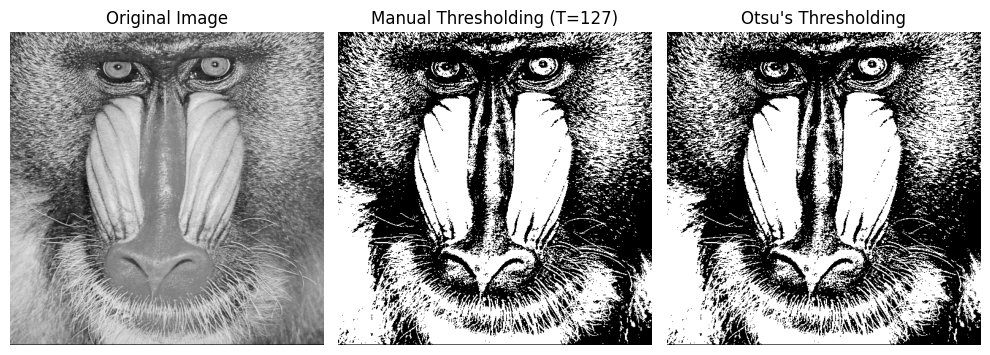

In [64]:
import cv2
import matplotlib.pyplot as plt

# Read the grayscale image
img = cv2.imread('images\mandrill.png', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if img is None:
    print("Error: Image not found!")
else:
    # Manual Thresholding: Define the threshold value
    T = 127
    _, img_bin_manual = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)

    # Otsu's Thresholding: Automatically compute the optimal threshold
    _, img_bin_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the images using Matplotlib to compare
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Manual Thresholding Result
    plt.subplot(1, 3, 2)
    plt.imshow(img_bin_manual, cmap='gray')
    plt.title('Manual Thresholding (T=127)')
    plt.axis('off')

    # Otsu's Thresholding Result
    plt.subplot(1, 3, 3)
    plt.imshow(img_bin_otsu, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Optional: Save the output images
    cv2.imwrite('manual_thresholding.jpg', img_bin_manual)
    cv2.imwrite('otsu_thresholding.jpg', img_bin_otsu)


***Add your analysis and comments here***

...


### Now, repeat Tasks 8 to 11 using different images of your choice and analyze the results.

---

# Manipulation 3: Quantize a Grayscale Image
### Understanding Quantization and Histograms
1- Quantization is the process of reducing the number of intensity levels in an image. In grayscale images, pixel values range from 0 to 255, representing 256 possible shades. By reducing these levels (e.g., to 128, 64, 32, etc.), we limit the number of shades, simplifying the image but potentially reducing its quality.

2- A histogram represents the distribution of pixel intensities in an image. It shows how frequently each intensity value appears. When we quantize an image, we effectively "group" similar intensity values, leading to a histogram with fewer distinct peaks. Observing these histograms helps us understand how information is lost and how the image’s appearance is affected.

---

Instructions
In this section, you will:

1- Quantize the grayscale image into different levels (128, 64, 32, 16, 8, 4, 2).
2- Visualize the quantized images and their histograms.
3- Observe the effects of reduced levels on image quality.

To quantize the grayscale image, apply the following formula:

`quantized_image = (Img_gray // (256 / levels)) * (256 / levels)`


### Task 1: Image Quantization
The goal is to observe how reducing the number of intensity levels affects image quality.

Steps:
Convert the image to grayscale using cv.cvtColor.

Define different quantization levels to reduce the number of shades in the image (e.g., quant_levels = {128, 64, 32, 16, 8, 4, 2}).

Apply quantization using the formula above.

In [74]:
# Use the following image for this section
img = cv.imread('./images/zelda.png')

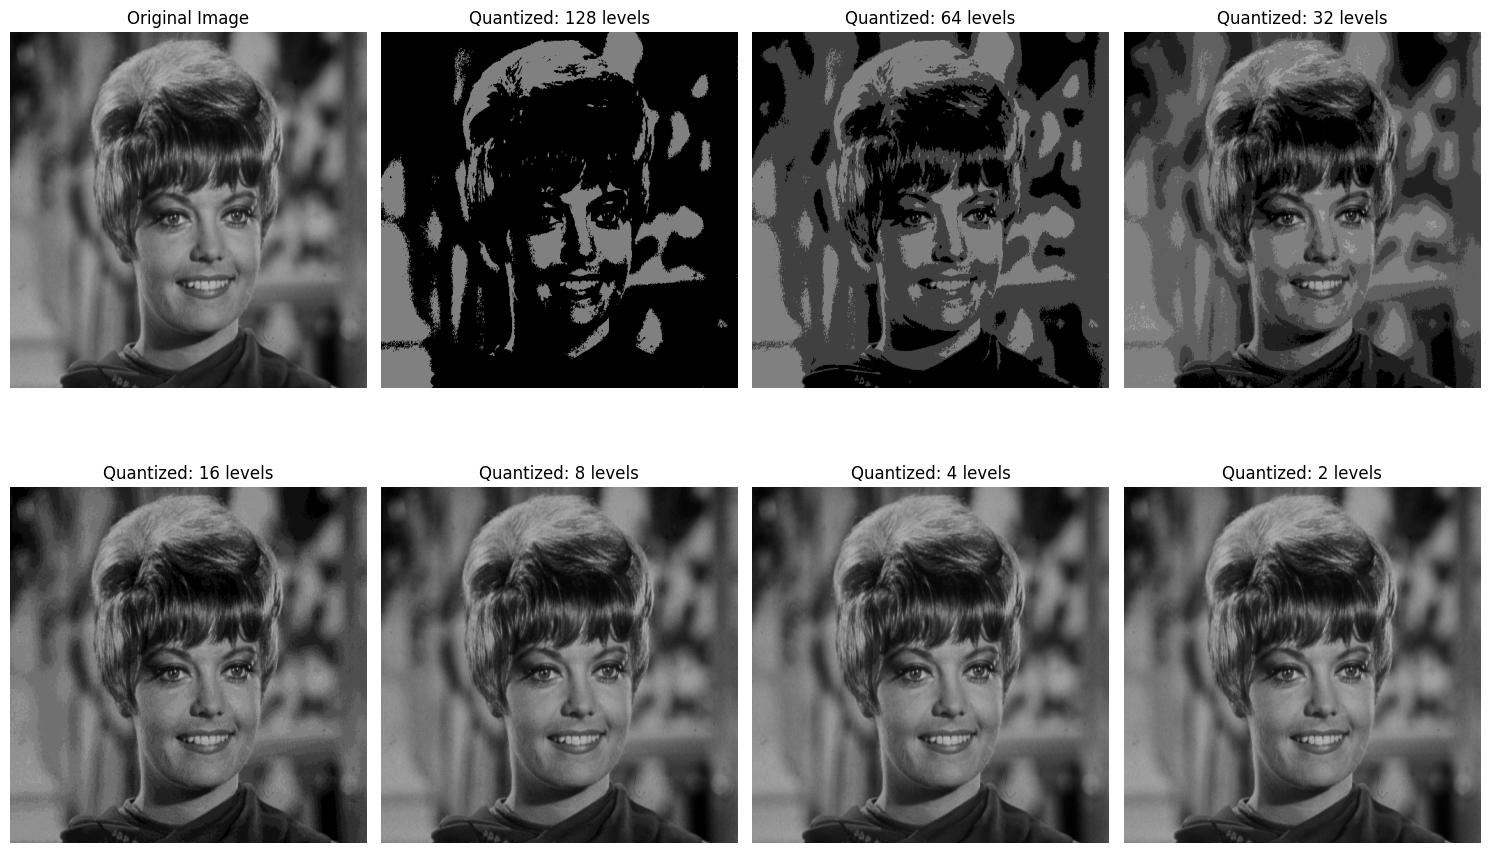

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found!")
else:
    # Define the quantization levels
    quant_levels = [128, 64, 32, 16, 8, 4, 2]

    # Set up the plot for displaying the results
    plt.figure(figsize=(15, 10))

    # Show the original grayscale image
    plt.subplot(2, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Apply quantization for each level
    for i, level in enumerate(quant_levels):
        # Apply quantization
        img_quantized = (img // level) * level

        # Display the quantized image
        plt.subplot(2, 4, i+2)
        plt.imshow(img_quantized, cmap='gray')
        plt.title(f"Quantized: {level} levels")
        plt.axis('off')

    # Show all the images
    plt.tight_layout()
    plt.show()

    # Optional: Save the quantized images
    for i, level in enumerate(quant_levels):
        cv2.imwrite(f'quantized_{level}_levels.jpg', img_quantized)


***Add your analysis and comments here***

...

---

### Task 2: Histogram Analysis
- Compute and display histograms for each quantized image.
- Use `cv.calcHist` to compute the histogram.

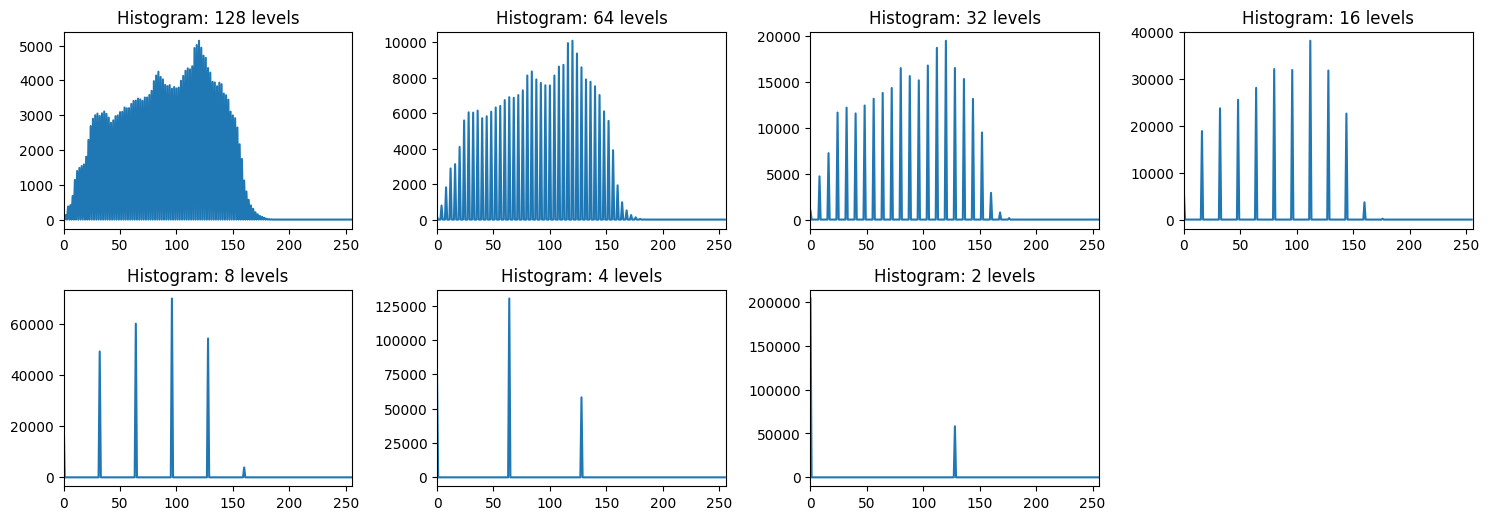

In [86]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
img = cv.imread('./images/zelda.png', cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not found!")
else:
    # Define the quantization levels
    quant_levels = [128, 64, 32, 16, 8, 4, 2]

    # Set up the plot for displaying the results
    plt.figure(figsize=(15, 10))

    # Apply quantization for each level and plot histogram
    for i, level in enumerate(quant_levels):
        # Apply quantization
        img_quantized = (img // (256 // level)) * (256 // level)  # Quantization formula

        # Compute histogram for the quantized image
        hist = cv.calcHist([img_quantized], [0], None, [256], [0, 256])


        # Plot the histogram in the correct position
        plt.subplot(4, 4, i+5)
        plt.plot(hist)
        plt.title(f"Histogram: {level} levels")
        plt.xlim(0, 256)

    # Show all the images and histograms
    plt.tight_layout()
    plt.show()

    # Optional: Save the quantized images and their histograms
    for i, level in enumerate(quant_levels):
        img_quantized = (img // (256 // level)) * (256 // level)  # Quantization formula
        cv.imwrite(f'quantized_{level}_levels.jpg', img_quantized)
        hist_filename = f'histogram_{level}_levels.png'
        plt.figure()
        plt.plot(hist)
        plt.title(f"Histogram: {level} levels")
        plt.xlim(0, 256)
        plt.savefig(hist_filename)
        plt.close()


***Add your analysis and comments here***

...


---
# Manipulation 4: Histogram Equalization
- Histogram equalization is a technique used to enhance the contrast of an image by redistributing pixel intensity values more evenly. It works by spreading out the most frequent intensity values, making details in darker and lighter regions more distinguishable.

- This method is particularly useful in images with low contrast, where pixel intensities are clustered within a narrow range. By equalizing the histogram, we aim to improve visibility and highlight important details.


### Task 1: Load and Analyze the Image

1. Load the image: Read the `flower.bmp` image using OpenCV.
2. Display the original color image.
4. Convert the image to grayscale.


In [87]:
# Use the following image for this section
img_color = cv.imread('./images/flower.bmp')

### Task 2: Compute and Display Histogram and Normalized Histogram

1. Calculate the histogram of the grayscale image using cv.calcHist(). This function provides the frequency of each intensity value (0–255).
2. Normalize the histogram by dividing each bin count by the total number of pixels in the image. This normalization converts the histogram into a probability distribution, which is useful for understanding the relative frequency of intensity values.
3. Visualize the original histogram and the normalized histogram side by side using Matplotlib. This will help in understanding how the intensity values are distributed and whether contrast enhancement is needed.

After visualizing the histograms, analyze:

1. Is the histogram spread across the full intensity range (0–255), or is it concentrated in a narrow range?
2. Does the image seem to have high or low contrast?

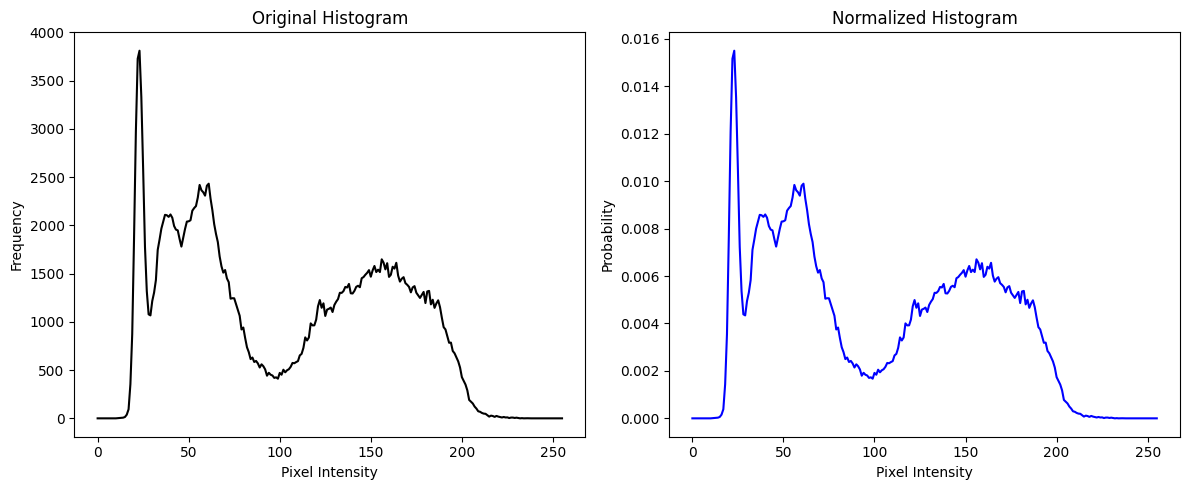

In [90]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load and Analyze the Image
# Load the original color image
img_color = cv.imread('./images/flower.bmp')

# Display the original color image
cv.imshow('Original Image', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert to grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Task 2: Compute and Display Histogram and Normalized Histogram
# Compute histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Plot the histograms
plt.figure(figsize=(12, 5))

# Original Histogram
plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Normalized Histogram
plt.subplot(1, 2, 2)
plt.plot(hist_norm, color='blue')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# Analysis:
# 1. If the histogram is spread across 0-255, the image has high contrast.
# 2. If the histogram is concentrated in a narrow range, the image has low contrast.


***Add your analysis and comments here***

...


### Task 3: Compute and Display Cumulative Histogram

- Calculate the cumulative histogram of the grayscale image using `cumsum()` on the computed histogram.
- Plot the cumulative histogram using Matplotlib.


***What is a Cumulative Histogram?***
A cumulative histogram represents the cumulative sum of pixel intensities in an image. Unlike a regular histogram that shows the frequency of each intensity value, a cumulative histogram provides insight into how intensities accumulate across the range.

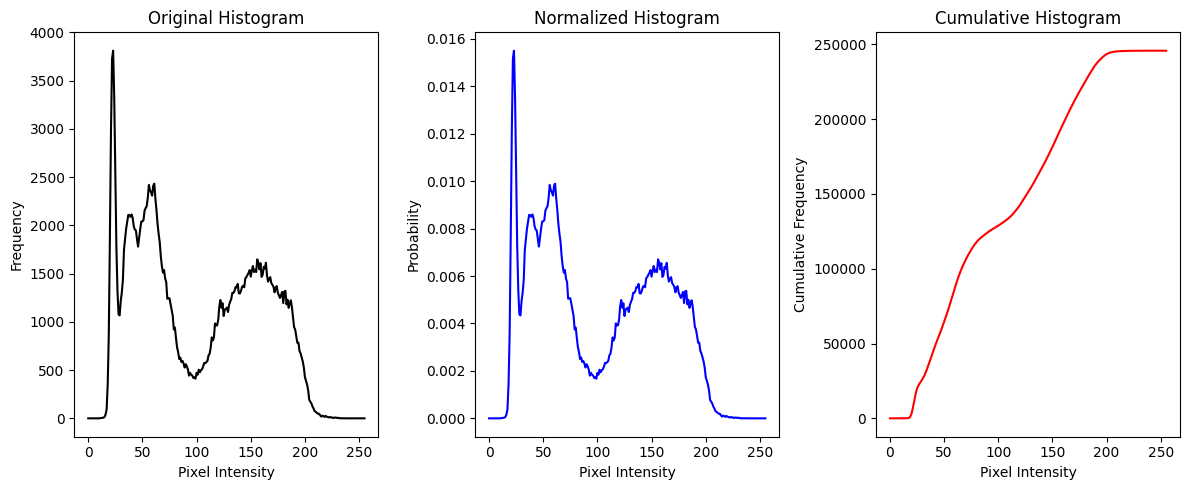

In [91]:
# Put your code here



import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load and Analyze the Image
# Load the original color image
img_color = cv.imread('./images/flower.bmp')

# Display the original color image
cv.imshow('Original Image', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert to grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Task 2: Compute and Display Histogram and Normalized Histogram
# Compute histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Plot the histograms
plt.figure(figsize=(12, 5))

# Original Histogram
plt.subplot(1, 3, 1)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Normalized Histogram
plt.subplot(1, 3, 2)
plt.plot(hist_norm, color='blue')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

# Task 3: Compute and Display Cumulative Histogram
# Compute cumulative histogram
cumulative_hist = hist.cumsum()

# Plot the cumulative histogram
plt.subplot(1, 3, 3)
plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# 1. If the histogram is spread across 0-255, the image has high contrast.
# 2. If the histogram is concentrated in a narrow range, the image has low contrast.
# 3. The cumulative histogram helps understand the overall distribution of intensities.






### Task 4: Histogram Equalization Using OpenCV


1. Apply OpenCV’s histogram equalization on the grayscale image using `cv.equalizeHist()`.
2. Compute and visualize the histogram of the equalized image.
3. Compare the histograms of the original grayscale image and the equalized image to observe how pixel intensities are redistributed.
4. Display the original and equalized grayscale images side by side to visually assess the contrast improvement.
5. Comment the results about how weel the image it becomes.

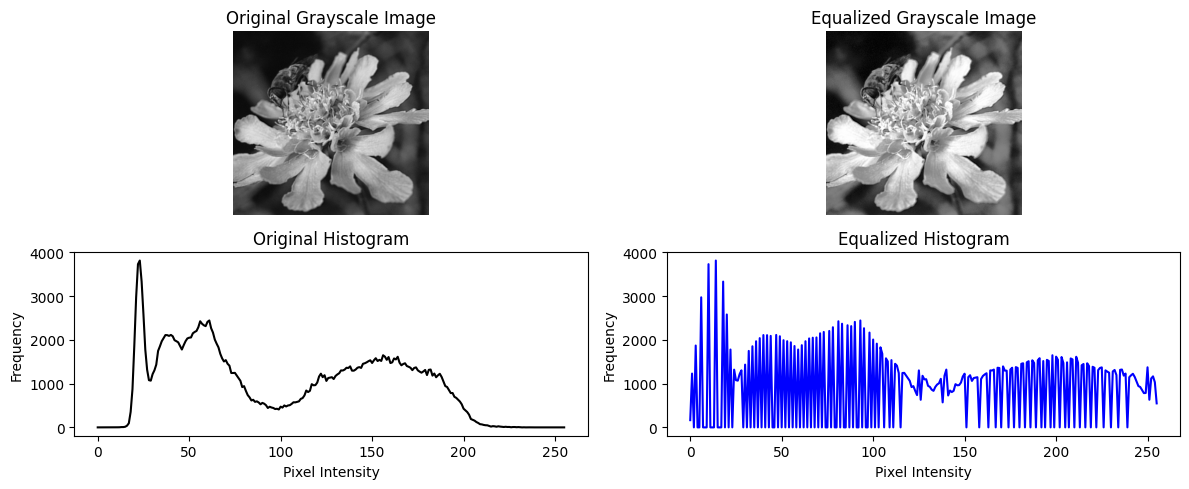

In [93]:

# Load the grayscale image
gray = cv.imread('./images/flower.bmp', cv.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized = cv.equalizeHist(gray)

# Compute histograms
hist_original = cv.calcHist([gray], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Display original and equalized images
plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

# Plot histograms
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='blue')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# 1. The equalized histogram should be more evenly spread across the intensity range (0-255).
# 2. If the original histogram was concentrated in a narrow range, the contrast should be visibly improved.
# 3. Histogram equalization enhances contrast, making details more distinguishable in the image.


***Add your analysis and comments here***

...


### Task 5: Manual Histogram Equalization and Comparison with OpenCV

In this task, you will implement histogram equalization manually and compare the results with OpenCV’s cv.equalizeHist() function. This will help in understanding how histogram equalization works at a pixel level.


1. Compute the histogram of the grayscale image.
2. Calculate the cumulative distribution function (CDF) from the histogram.
3. Normalize the CDF to scale pixel values between 0 and 255.
4. Use the CDF as a mapping function to adjust pixel intensities in the grayscale image.
5. Compare the manually equalized image with OpenCV’s equalizeHist() output.
6. Compute and visualize histograms of both equalized images.
7. Analyze the results, noting differences in contrast and intensity distribution.

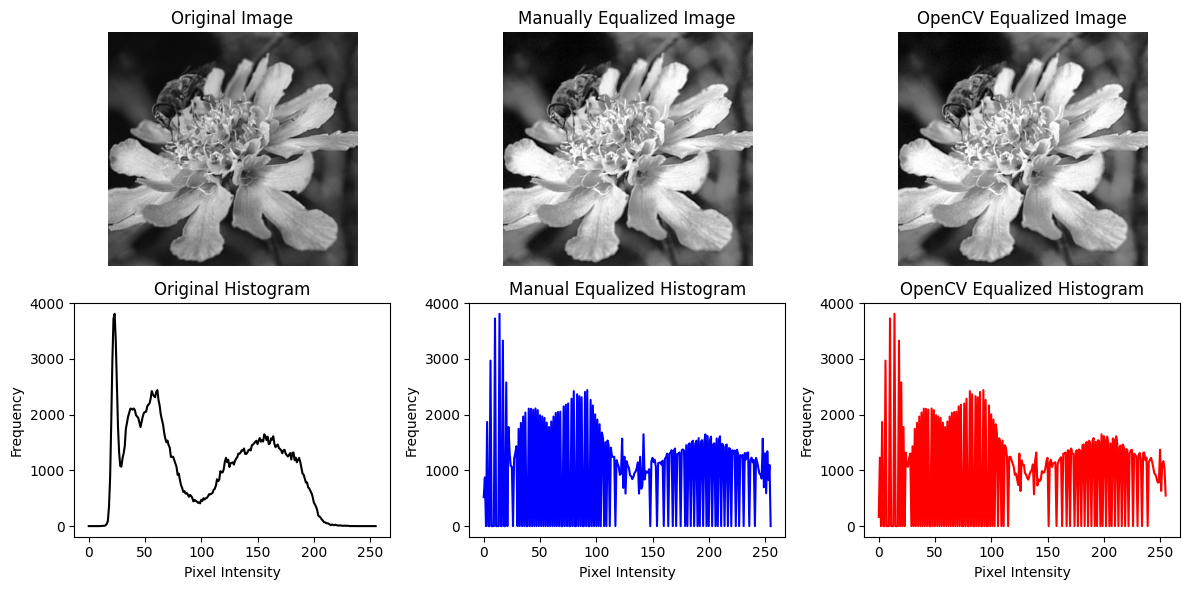

In [95]:
# Put your code here


# Load the grayscale image
gray = cv.imread('./images/flower.bmp', cv.IMREAD_GRAYSCALE)

# Task 5.1: Compute Histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Task 5.2: Compute CDF
cdf = hist.cumsum()

# Normalize the CDF to scale pixel values between 0 and 255
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype(np.uint8)

# Task 5.4: Map pixel intensities using the CDF
manual_equalized = cdf_normalized[gray]

# Task 5.5: OpenCV Equalization
opencv_equalized = cv.equalizeHist(gray)

# Task 5.6: Compute Histograms for Comparison
hist_manual = cv.calcHist([manual_equalized], [0], None, [256], [0, 256])
hist_opencv = cv.calcHist([opencv_equalized], [0], None, [256], [0, 256])

# Task 5.7: Display Images and Histograms
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Manually Equalized Image
plt.subplot(2, 3, 2)
plt.imshow(manual_equalized, cmap='gray')
plt.title('Manually Equalized Image')
plt.axis('off')

# OpenCV Equalized Image
plt.subplot(2, 3, 3)
plt.imshow(opencv_equalized, cmap='gray')
plt.title('OpenCV Equalized Image')
plt.axis('off')

# Original Histogram
plt.subplot(2, 3, 4)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Manual Equalized Histogram
plt.subplot(2, 3, 5)
plt.plot(hist_manual, color='blue')
plt.title('Manual Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# OpenCV Equalized Histogram
plt.subplot(2, 3, 6)
plt.plot(hist_opencv, color='red')
plt.title('OpenCV Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# - Compare manually equalized and OpenCV results.
# - Manually equalized histogram should be similar to OpenCV’s.
# - Histogram equalization improves contrast by redistributing pixel intensities.


***Add your analysis and comments here***

...


### Task 6: Equalize Color Image Channels Independently

- Objective: Apply histogram equalization independently to each color channel (B, G, R) and calculate the entropy of the equalized channels.
- Steps:
    1. Split the color image into its Blue (B), Green (G), and Red (R) channels.
    2. Equalize each channel independently using cv.equalizeHist.
    3. Merge the equalized channels back into a single color image.
    4. Define a function to calculate entropy for a single channel.
    5. Compute the entropy of each equalized channel to analyze the uniformity of pixel intensities.
    6. Visualize the original color image and the independently equalized color image side by side.
- Comments:
    - Independent equalization of channels can enhance contrast but might cause slight color distortions.
    - Higher entropy values indicate a more uniform intensity distribution.

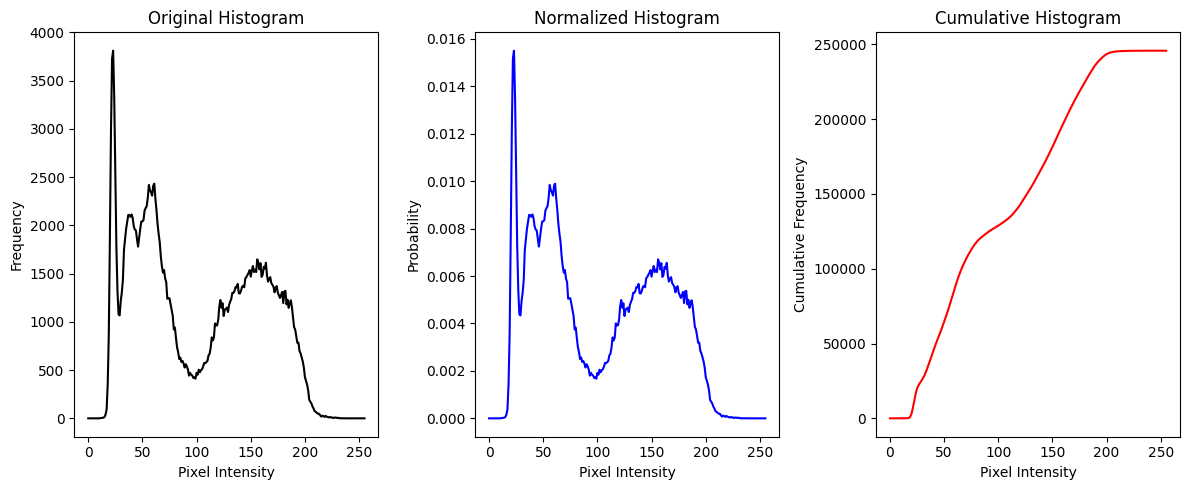

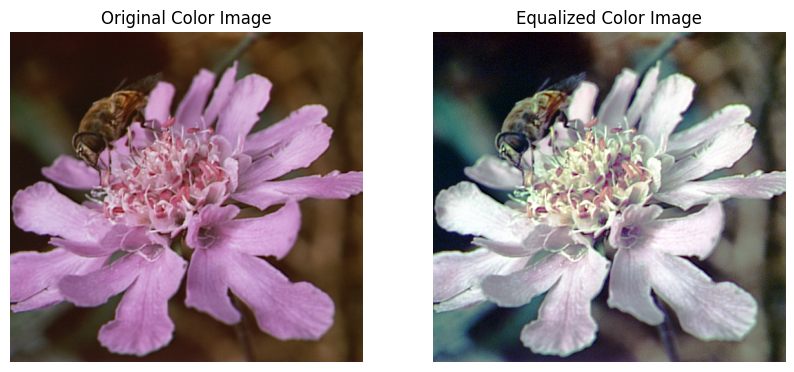

Entropy of Equalized Blue Channel: 7.1108
Entropy of Equalized Green Channel: 7.3195
Entropy of Equalized Red Channel: 7.3165


In [97]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load and Analyze the Image
# Load the original color image
img_color = cv.imread('./images/flower.bmp')

# Display the original color image
cv.imshow('Original Image', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert to grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Task 2: Compute and Display Histogram and Normalized Histogram
# Compute histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Plot the histograms
plt.figure(figsize=(12, 5))

# Original Histogram
plt.subplot(1, 3, 1)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Normalized Histogram
plt.subplot(1, 3, 2)
plt.plot(hist_norm, color='blue')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

# Task 3: Compute and Display Cumulative Histogram
# Compute cumulative histogram
cumulative_hist = hist.cumsum()

# Plot the cumulative histogram
plt.subplot(1, 3, 3)
plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# 1. If the histogram is spread across 0-255, the image has high contrast.
# 2. If the histogram is concentrated in a narrow range, the image has low contrast.
# 3. The cumulative histogram helps understand the overall distribution of intensities.

# Task 6: Equalize Color Image Channels Independently
# Split the image into B, G, R channels
b, g, r = cv.split(img_color)

# Equalize each channel independently
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge the equalized channels
img_eq = cv.merge([b_eq, g_eq, r_eq])

# Function to compute entropy of an image channel
def compute_entropy(channel):
    hist_channel = cv.calcHist([channel], [0], None, [256], [0, 256])
    hist_channel /= hist_channel.sum()  # Normalize to get probability
    entropy = -np.sum(hist_channel * np.log2(hist_channel + 1e-7))  # Compute entropy
    return entropy

# Compute entropy for each channel
entropy_b = compute_entropy(b_eq)
entropy_g = compute_entropy(g_eq)
entropy_r = compute_entropy(r_eq)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title('Equalized Color Image')
plt.axis('off')

plt.show()

# Print entropy values
print(f"Entropy of Equalized Blue Channel: {entropy_b:.4f}")
print(f"Entropy of Equalized Green Channel: {entropy_g:.4f}")
print(f"Entropy of Equalized Red Channel: {entropy_r:.4f}")

# Analysis:
# - Higher entropy means more uniform intensity distribution.
# - Independent equalization can enhance contrast but may introduce color distortions.


***Add your analysis and comments here***

...


### Task 7: Equalize Color Channels Using Cumulative Histogram

- Objective: Perform histogram equalization on each color channel (B, G, R) using the cumulative histogram from the grayscale image and calculate the entropy for the resulting image.
- Steps:
    1. Normalize the cumulative histogram from the grayscale image to scale it to the range [0, 255].
    2. Apply the normalized cumulative histogram to each color channel (B, G, R).
    3. Merge the equalized channels back into a single color image.
    4. Calculate the entropy of the equalized channels to analyze the uniformity of pixel intensities.
    5. Display the original and cumulatively equalized color images for comparison.

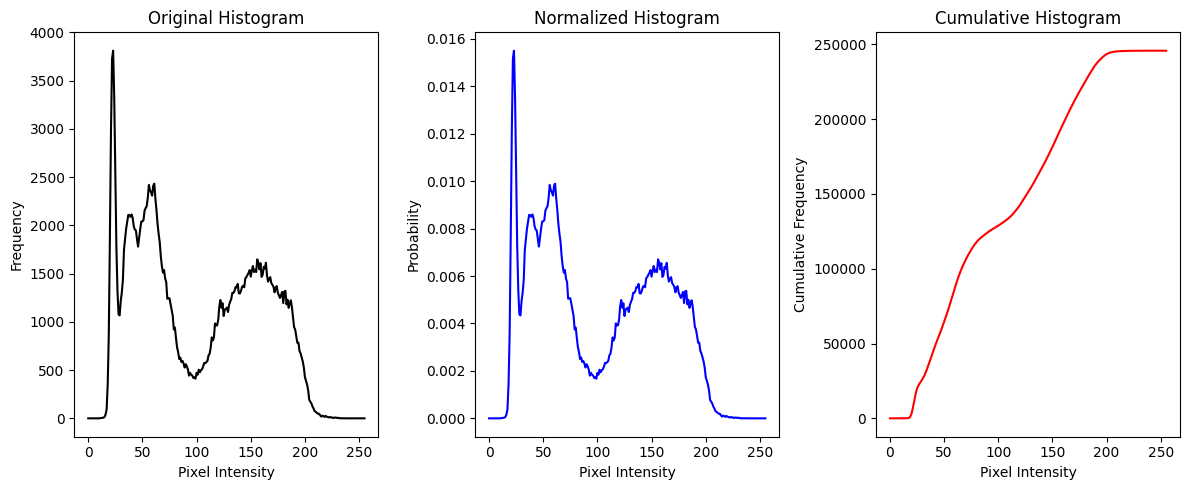

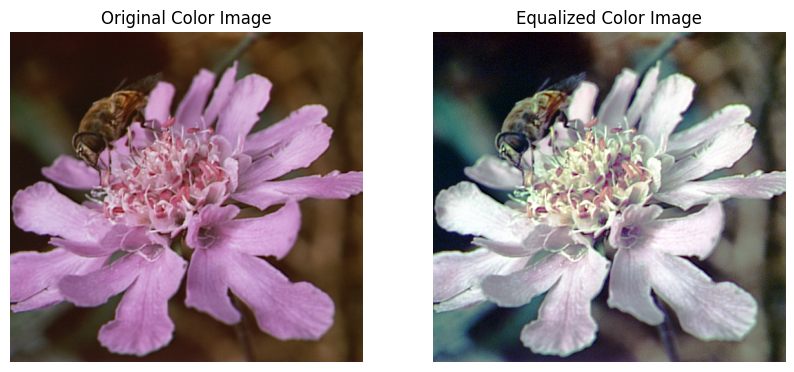

Entropy of Equalized Blue Channel: 7.1108
Entropy of Equalized Green Channel: 7.3195
Entropy of Equalized Red Channel: 7.3165


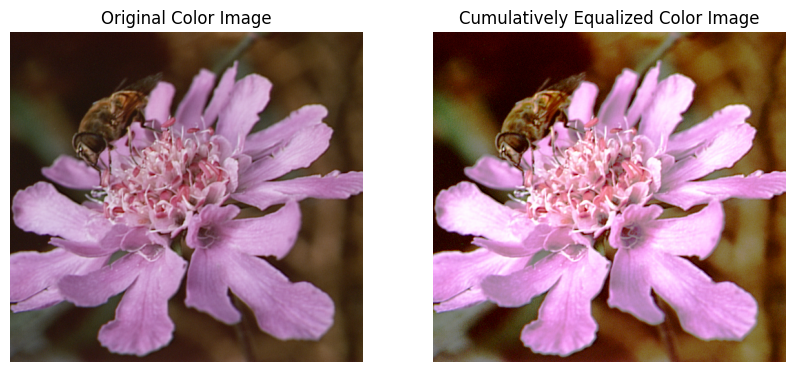

Entropy of Cumulatively Equalized Blue Channel: 6.1199
Entropy of Cumulatively Equalized Green Channel: 7.1084
Entropy of Cumulatively Equalized Red Channel: 6.8422


In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load and Analyze the Image
# Load the original color image
img_color = cv.imread('./images/flower.bmp')

# Display the original color image
cv.imshow('Original Image', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert to grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Task 2: Compute and Display Histogram and Normalized Histogram
# Compute histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Plot the histograms
plt.figure(figsize=(12, 5))

# Original Histogram
plt.subplot(1, 3, 1)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Normalized Histogram
plt.subplot(1, 3, 2)
plt.plot(hist_norm, color='blue')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

# Task 3: Compute and Display Cumulative Histogram
# Compute cumulative histogram
cumulative_hist = hist.cumsum()

# Plot the cumulative histogram
plt.subplot(1, 3, 3)
plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# 1. If the histogram is spread across 0-255, the image has high contrast.
# 2. If the histogram is concentrated in a narrow range, the image has low contrast.
# 3. The cumulative histogram helps understand the overall distribution of intensities.

# Task 6: Equalize Color Image Channels Independently
# Split the image into B, G, R channels
b, g, r = cv.split(img_color)

# Equalize each channel independently
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge the equalized channels
img_eq = cv.merge([b_eq, g_eq, r_eq])

# Function to compute entropy of an image channel
def compute_entropy(channel):
    hist_channel = cv.calcHist([channel], [0], None, [256], [0, 256])
    hist_channel /= hist_channel.sum()  # Normalize to get probability
    entropy = -np.sum(hist_channel * np.log2(hist_channel + 1e-7))  # Compute entropy
    return entropy

# Compute entropy for each channel
entropy_b = compute_entropy(b_eq)
entropy_g = compute_entropy(g_eq)
entropy_r = compute_entropy(r_eq)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title('Equalized Color Image')
plt.axis('off')

plt.show()

# Print entropy values
print(f"Entropy of Equalized Blue Channel: {entropy_b:.4f}")
print(f"Entropy of Equalized Green Channel: {entropy_g:.4f}")
print(f"Entropy of Equalized Red Channel: {entropy_r:.4f}")

# Analysis:
# - Higher entropy means more uniform intensity distribution.
# - Independent equalization can enhance contrast but may introduce color distortions.

# Task 7: Equalize Color Channels Using Cumulative Histogram
# Compute cumulative histogram of grayscale image
cumulative_hist_norm = cumulative_hist / cumulative_hist.max() * 255
cumulative_hist_norm = cumulative_hist_norm.astype(np.uint8)

# Apply cumulative histogram mapping to each channel
b_eq_cum = cv.LUT(b, cumulative_hist_norm)
g_eq_cum = cv.LUT(g, cumulative_hist_norm)
r_eq_cum = cv.LUT(r, cumulative_hist_norm)

# Merge the channels back
img_eq_cum = cv.merge([b_eq_cum, g_eq_cum, r_eq_cum])

# Compute entropy for each channel after cumulative histogram equalization
entropy_b_cum = compute_entropy(b_eq_cum)
entropy_g_cum = compute_entropy(g_eq_cum)
entropy_r_cum = compute_entropy(r_eq_cum)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_eq_cum, cv.COLOR_BGR2RGB))
plt.title('Cumulatively Equalized Color Image')
plt.axis('off') 

plt.show()

# Print entropy values
print(f"Entropy of Cumulatively Equalized Blue Channel: {entropy_b_cum:.4f}")
print(f"Entropy of Cumulatively Equalized Green Channel: {entropy_g_cum:.4f}")
print(f"Entropy of Cumulatively Equalized Red Channel: {entropy_r_cum:.4f}")

# Analysis:
# - Cumulative histogram equalization redistributes pixel intensities in a way that enhances contrast.
# - Comparing entropy values helps assess the uniformity of intensity distribution.
# - The method ensures a more global contrast adjustment based on grayscale intensity distribution.


***Add your analysis and comments here***

...


### Task 8: Compare Independent and Cumulative Equalization

1. Print the entropies for each channel (B, G, R) after independent and cumulative equalization.
2. Analyze the differences in entropy values between the two methods.

- Comments:
    - Entropies are generally higher for cumulative equalization, reflecting a more uniform intensity distribution across all channels.
    - Independent equalization can cause color distortions due to varying transformations applied to each channel.
    - Cumulative equalization uses a consistent transformation, ensuring better color preservation.

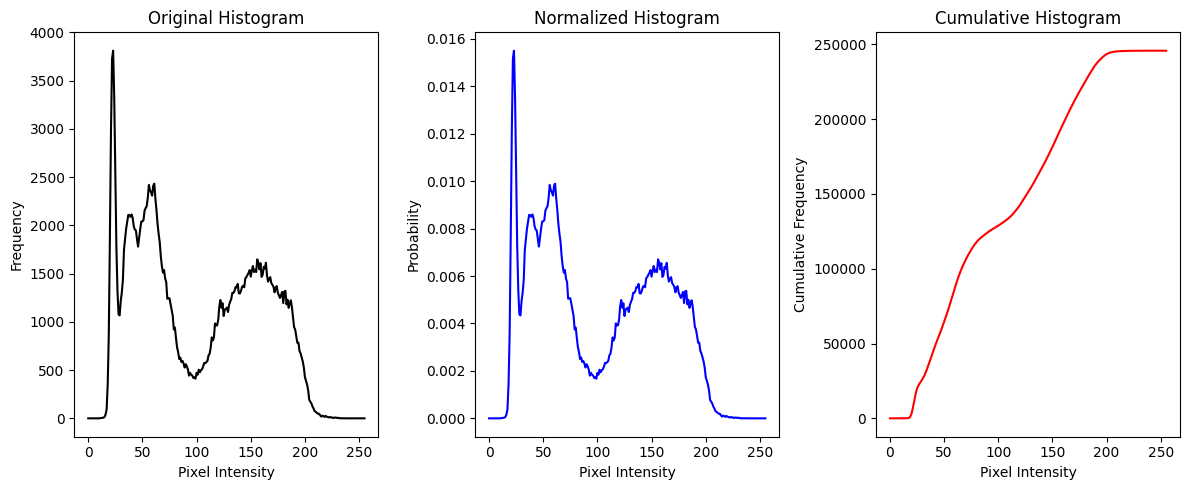

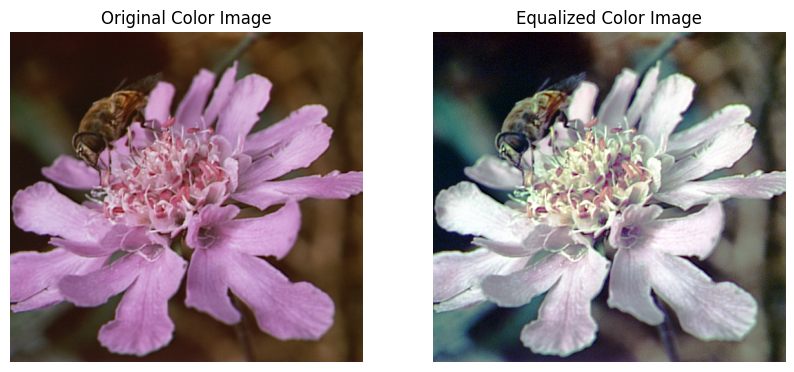

Entropy of Equalized Blue Channel: 7.1108
Entropy of Equalized Green Channel: 7.3195
Entropy of Equalized Red Channel: 7.3165


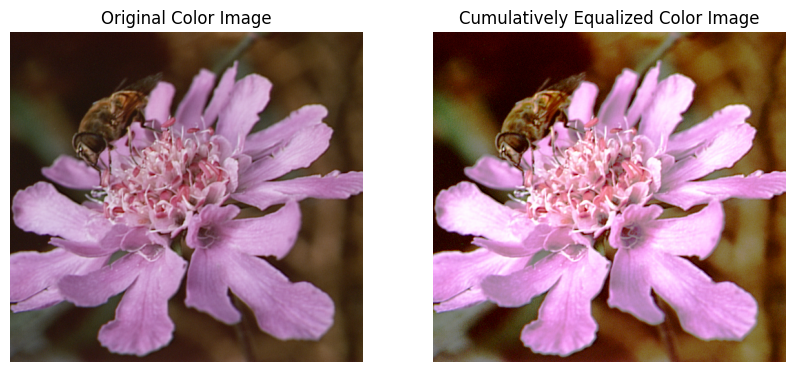

Entropy of Cumulatively Equalized Blue Channel: 6.1199
Entropy of Cumulatively Equalized Green Channel: 7.1084
Entropy of Cumulatively Equalized Red Channel: 6.8422

Comparison of Entropies Between Independent and Cumulative Equalization:
Blue Channel - Independent: 7.1108, Cumulative: 6.1199
Green Channel - Independent: 7.3195, Cumulative: 7.1084
Red Channel - Independent: 7.3165, Cumulative: 6.8422


In [99]:
# Put your code here

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Load and Analyze the Image
# Load the original color image
img_color = cv.imread('./images/flower.bmp')

# Display the original color image
cv.imshow('Original Image', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# Convert to grayscale
gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Task 2: Compute and Display Histogram and Normalized Histogram
# Compute histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Plot the histograms
plt.figure(figsize=(12, 5))

# Original Histogram
plt.subplot(1, 3, 1)
plt.plot(hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Normalized Histogram
plt.subplot(1, 3, 2)
plt.plot(hist_norm, color='blue')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

# Task 3: Compute and Display Cumulative Histogram
# Compute cumulative histogram
cumulative_hist = hist.cumsum()

# Plot the cumulative histogram
plt.subplot(1, 3, 3)
plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()

# Analysis:
# 1. If the histogram is spread across 0-255, the image has high contrast.
# 2. If the histogram is concentrated in a narrow range, the image has low contrast.
# 3. The cumulative histogram helps understand the overall distribution of intensities.

# Task 6: Equalize Color Image Channels Independently
# Split the image into B, G, R channels
b, g, r = cv.split(img_color)

# Equalize each channel independently
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge the equalized channels
img_eq = cv.merge([b_eq, g_eq, r_eq])

# Function to compute entropy of an image channel
def compute_entropy(channel):
    hist_channel = cv.calcHist([channel], [0], None, [256], [0, 256])
    hist_channel /= hist_channel.sum()  # Normalize to get probability
    entropy = -np.sum(hist_channel * np.log2(hist_channel + 1e-7))  # Compute entropy
    return entropy

# Compute entropy for each channel
entropy_b = compute_entropy(b_eq)
entropy_g = compute_entropy(g_eq)
entropy_r = compute_entropy(r_eq)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title('Equalized Color Image')
plt.axis('off')

plt.show()

# Print entropy values
print(f"Entropy of Equalized Blue Channel: {entropy_b:.4f}")
print(f"Entropy of Equalized Green Channel: {entropy_g:.4f}")
print(f"Entropy of Equalized Red Channel: {entropy_r:.4f}")

# Analysis:
# - Higher entropy means more uniform intensity distribution.
# - Independent equalization can enhance contrast but may introduce color distortions.

# Task 7: Equalize Color Channels Using Cumulative Histogram
# Compute cumulative histogram of grayscale image
cumulative_hist_norm = cumulative_hist / cumulative_hist.max() * 255
cumulative_hist_norm = cumulative_hist_norm.astype(np.uint8)

# Apply cumulative histogram mapping to each channel
b_eq_cum = cv.LUT(b, cumulative_hist_norm)
g_eq_cum = cv.LUT(g, cumulative_hist_norm)
r_eq_cum = cv.LUT(r, cumulative_hist_norm)

# Merge the channels back
img_eq_cum = cv.merge([b_eq_cum, g_eq_cum, r_eq_cum])

# Compute entropy for each channel after cumulative histogram equalization
entropy_b_cum = compute_entropy(b_eq_cum)
entropy_g_cum = compute_entropy(g_eq_cum)
entropy_r_cum = compute_entropy(r_eq_cum)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_eq_cum, cv.COLOR_BGR2RGB))
plt.title('Cumulatively Equalized Color Image')
plt.axis('off')

plt.show()

# Print entropy values
print(f"Entropy of Cumulatively Equalized Blue Channel: {entropy_b_cum:.4f}")
print(f"Entropy of Cumulatively Equalized Green Channel: {entropy_g_cum:.4f}")
print(f"Entropy of Cumulatively Equalized Red Channel: {entropy_r_cum:.4f}")

# Task 8: Compare Independent and Cumulative Equalization
print("\nComparison of Entropies Between Independent and Cumulative Equalization:")
print(f"Blue Channel - Independent: {entropy_b:.4f}, Cumulative: {entropy_b_cum:.4f}")
print(f"Green Channel - Independent: {entropy_g:.4f}, Cumulative: {entropy_g_cum:.4f}")
print(f"Red Channel - Independent: {entropy_r:.4f}, Cumulative: {entropy_r_cum:.4f}")

# Analysis:
# - Entropies are generally higher for cumulative equalization, reflecting a more uniform intensity distribution.
# - Independent equalization can cause color distortions due to varying transformations applied to each channel.
# - Cumulative equalization uses a consistent transformation, ensuring better color preservation.


***Add your analysis and comments here***

...


# Manipulation 5: Image Similarity Analysis
In this optional section, you will explore how images can be compared based on their statistical properties. The goal is to understand how image similarity can be assessed without directly comparing individual pixels but rather by analyzing overall intensity distributions.

---

- One possible solution is to analyze the histogram of the images.


In [100]:
# Put your code here

# Task 9: Image Similarity Analysis

# Function to compute histogram and normalize it
def compute_histogram(image):
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    hist = cv.normalize(hist, hist).flatten()
    return hist

# Function to compare histograms using different methods
def compare_histograms(hist1, hist2):
    correlation = cv.compareHist(hist1, hist2, cv.HISTCMP_CORREL)
    chi_square = cv.compareHist(hist1, hist2, cv.HISTCMP_CHISQR)
    intersection = cv.compareHist(hist1, hist2, cv.HISTCMP_INTERSECT)
    bhattacharyya = cv.compareHist(hist1, hist2, cv.HISTCMP_BHATTACHARYYA)
    
    return correlation, chi_square, intersection, bhattacharyya

# Compute histograms for grayscale versions of the images
gray_orig_hist = compute_histogram(gray)
gray_indep_eq_hist = compute_histogram(cv.cvtColor(img_eq, cv.COLOR_BGR2GRAY))
gray_cum_eq_hist = compute_histogram(cv.cvtColor(img_eq_cum, cv.COLOR_BGR2GRAY))

# Compare histograms between original and equalized images
metrics_indep = compare_histograms(gray_orig_hist, gray_indep_eq_hist)
metrics_cum = compare_histograms(gray_orig_hist, gray_cum_eq_hist)

# Print similarity metrics
print("\nHistogram Similarity Metrics:")
print("Comparison: Original vs Independently Equalized Image")
print(f"  Correlation: {metrics_indep[0]:.4f}")
print(f"  Chi-Square: {metrics_indep[1]:.4f}")
print(f"  Intersection: {metrics_indep[2]:.4f}")
print(f"  Bhattacharyya Distance: {metrics_indep[3]:.4f}")

print("\nComparison: Original vs Cumulatively Equalized Image")
print(f"  Correlation: {metrics_cum[0]:.4f}")
print(f"  Chi-Square: {metrics_cum[1]:.4f}")
print(f"  Intersection: {metrics_cum[2]:.4f}")
print(f"  Bhattacharyya Distance: {metrics_cum[3]:.4f}")

# Analysis:
# - A high correlation value (close to 1) means histograms are similar.
# - A low Chi-Square value means less difference between histograms.
# - A higher intersection value suggests more overlap in intensity distributions.
# - A lower Bhattacharyya distance means the histograms are more similar.



Histogram Similarity Metrics:
Comparison: Original vs Independently Equalized Image
  Correlation: -0.0858
  Chi-Square: 561.7967
  Intersection: 9.4741
  Bhattacharyya Distance: 0.3910

Comparison: Original vs Cumulatively Equalized Image
  Correlation: -0.0920
  Chi-Square: 907.5342
  Intersection: 8.7311
  Bhattacharyya Distance: 0.4040
